In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mission 4

In [2]:
df_final = pd.read_csv('df_final')

In [3]:
df_final.shape

(3799500, 7)

In [4]:
import statsmodels.formula.api as smf

## ANOVA

<p> Commençons par une boxplot, nous passerons ensuite au calcul de l'ANOVA ; </p>

<p> Pour plus de lisibilité nous en prendrons que 10 Pays sur les 76 </p>

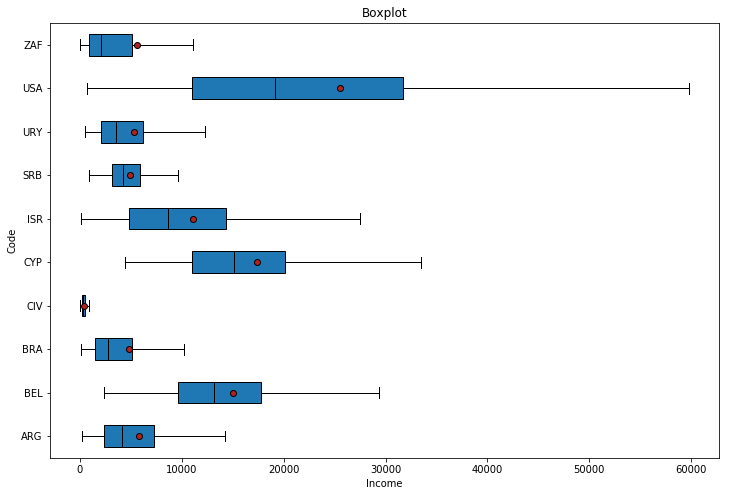

La variance :
ARG : 34634965
BEL : 92222234
BRA : 52109735
CIV : 142892
CYP : 127129528
ISR : 90789160
SRB : 6912608
URY : 35104460
USA : 589070300
ZAF : 115623596


In [5]:
np.random.seed(1)
sample = np.random.randint(76, size=10)
X_ = df_final['code'].unique()[sample]
sampled_data_ = df_final[df_final.code.isin(X_)]

X = "code" # qualitative

Y = "income" # quantitative

sous_echantillon = sampled_data_

modalites = sous_echantillon[X].unique()

groupes = []

for m in modalites:

    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

medianprops = {'color':"black"}

meanprops = {'marker':'o', 'markeredgecolor':'black',

            'markerfacecolor':'firebrick'}

plt.figure(figsize=[12,8])
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 

            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Boxplot")
plt.xlabel("Income")
plt.ylabel("Code")
plt.savefig("Graphiques/boxplot_.png")
plt.show()

print('La variance :')
for pays in sampled_data_.code.unique() :
    sampled_pays = sampled_data_[sampled_data_['code'] == pays]
    print(pays, ":", round(sampled_pays['income'].var()))

In [6]:
anova_pays = smf.ols('income~code', data=df_final).fit()
print(anova_pays.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 4.064e+04
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:59:21   Log-Likelihood:            -3.9530e+07
No. Observations:             3799500   AIC:                         7.906e+07
Df Residuals:                 3799424   BIC:                         7.906e+07
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2994.8299     35.703     83.883      

In [7]:
import statsmodels.api as sm
anov_table = sm.stats.anova_lm(anova_pays, typ=2)
anov_table

,sum_sq,df,F,PR(>F)
code,1.942574e+14,75.0,40639.163243,0.0
Residual,2.421527e+14,3799424.0,NaN,NaN


<p> Test de Ficher : <br/>
    La p_valeur = 0 ; Le pays a donc bien un impact sur les revenus. </p>

Une p-valeur strictement égale à 0 est significative : <br/>
https://www.researchgate.net/post/p_value_of_0000

## Régressions Linéaires

### Income sans logarithme

In [8]:
reg_multi = smf.ols("income~Gini+mean_income", data=df_final).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.524e+06
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:59:24   Log-Likelihood:            -3.9530e+07
No. Observations:             3799500   AIC:                         7.906e+07
Df Residuals:                 3799497   BIC:                         7.906e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.496e-08     12.748  -1.17e-09      

<p>On voit sur cette régression que l'indice de Gini n'est pas significatif, on peut donc l'enlever</p>

In [9]:
reg_multi1 = smf.ols("income~mean_income", data=df_final).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 3.048e+06
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:59:25   Log-Likelihood:            -3.9530e+07
No. Observations:             3799500   AIC:                         7.906e+07
Df Residuals:                 3799498   BIC:                         7.906e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.224e-10      6.282  -8.32e-11      

<p> Le paramètre est ici significatif, et on obtient un R-squared de 0.445 </p>

<p> R² = SCE/SCT ; </p>
    
<p> La décomposition de variance totale expliquée pour le pays de naissance est donc égale à 0.445 </p>

<p> Et pour les autres facteurs, on a 1-0.445 = 0.555 </p>

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
coli = df_final[['income', 'Gini', 'mean_income']]
corr = np.corrcoef(coli, rowvar=0)
w, v = np.linalg.eig(corr)
w

array([1.66755086, 0.33280761, 0.99964153])

<p> Il y a colinéarité si l'une des eigen values était proche de 0 </p>
<p> Pas de problème de colinéarité </p>

### Income logarithme

In [12]:
reg_multi_ln = smf.ols("income~Gini+mean_income.apply(np.log)", data=df_final).fit()
print(reg_multi_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 1.065e+06
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:59:27   Log-Likelihood:            -3.9804e+07
No. Observations:             3799500   AIC:                         7.961e+07
Df Residuals:                 3799497   BIC:                         7.961e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<p> En passant la variable mean_income en logarithm on obtient deux paramètres significatifs, cependant, on peut voir que le R-squared est faible : 0.359  </p>

<p> On gardera tout de même ce modèle puisqu'il contient plus de paramètres </p>

<p> La décomposition de variance totale expliquée pour le pays de naissance est donc égale à 0.359 </p>

<p> Et pour les autres facteurs, on a 1-0.359 = 0.641 </p>

In [13]:
df_final['log'] = df_final['mean_income'].apply(np.log)
coli = df_final[['income', 'Gini', 'log']]
corr = np.corrcoef(coli, rowvar=0)
w, v = np.linalg.eig(corr)
w

array([1.61142273, 0.39233308, 0.99624419])

Encore une fois, pas de colinéarité entre les variables

## Amélioration du modèle :  

### Income logarithme

In [14]:
reg_multi_ln = smf.ols("income~Gini+mean_income.apply(np.log)+c_i_parents", 
                       data=df_final).fit()

print(reg_multi_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 8.066e+05
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:59:30   Log-Likelihood:            -3.9713e+07
No. Observations:             3799500   AIC:                         7.943e+07
Df Residuals:                 3799496   BIC:                         7.943e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<p> Les paramètres sont là aussi significatifs, cependant le R-squared est inférieur à la reg précédente : 0.389 </p>

<p> La droite de régression s'écrit donc sous la forme : aX1 + bX2 + cX3 + d ; Soit : <br/>
    -58.7538*X1 + 6284.2806*X2 + 64.2410*X3 + (-4.683e+04) <br/>
    Avec : <ul> 
    <li> X1 = Gini </li>
    <li> X2 = Mean_income (en log) </li>
    <li> X3 = c_i_parents </li> </ul>

<p> L'indice de Gini est placé en coefficient négatif, ce qui veut dire que plus l'Income est grand, plus le revenu moyen est grand (logique), plus l'indice est petit. </p>

<p> On peut donc en conclure que plus on va dans un  pays inégalitaire, plus l'indice est grand, et plus l'income et le mean_income sont petits ; Un pays inégalitaire ne favorise donc pas plus de personne qu'il n'en défavorise </p>

<p> Ici, la décomposition de variance totale expliquée pour le pays de naissance est égale à 0.389 ; Et celle non expliquée est de 1-0.389 = 0.611 </p>

### Analyse des résultats de la régression

#### Normalité des résidus : 
On ne peut pas utiliser de trest de shapiro dans ce cas là, le nombre de données excedant les 2000 ; On va donc utiliser le test de Stephens

In [16]:
import scipy.stats
scipy.stats.anderson(reg_multi_ln.resid)

AndersonResult(statistic=233667.2212877213, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<p> Ici, l'hypothèse de normalité n'est pas remise en cause (Statistic > critical value). </p>
<p> Les résidus suivent donc une loi normal, ce qui nous montre que le modèle fit bien les données et est performant </p>

# Annexe 1 Liens vers des articles ou sujets de forums :

https://newonlinecourses.science.psu.edu/stat501/node/281/

https://stats.stackexchange.com/questions/54533/what-do-normal-residuals-mean-and-what-does-this-tell-me-about-my-data

https://www.quora.com/Why-is-the-normality-of-residuals-assumption-important-in-regression-analysis